# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-imbalance\\your-code\\imbalance_data.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print(len(data)) #check the amount of data we have

6362620


In [5]:
# Get a sample of 100000:
data_sample = data.sample(100000)

In [6]:
print(len(data_sample))

100000


In [7]:
#Check the types of each column:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5904840 to 1338991
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


In [8]:
data_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.506080,1.786798e+05,8.329400e+05,8.536035e+05,1.103296e+06,1.227971e+06,0.001300,0.0
std,141.576449,5.705373e+05,2.907079e+06,2.943481e+06,3.409914e+06,3.712439e+06,0.036032,0.0
min,1.000000,4.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.322560e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,240.000000,7.458273e+04,1.413700e+04,0.000000e+00,1.347709e+05,2.163744e+05,0.000000,0.0
75%,334.000000,2.085457e+05,1.070833e+05,1.428056e+05,9.653844e+05,1.129757e+06,0.000000,0.0
max,738.000000,6.988673e+07,3.445192e+07,3.499147e+07,2.493709e+08,2.916677e+08,1.000000,0.0


In [9]:
data_sample.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
data_sample["type"].value_counts()

CASH_OUT    35305
PAYMENT     33898
CASH_IN     21765
TRANSFER     8401
DEBIT         631
Name: type, dtype: int64

<AxesSubplot:>

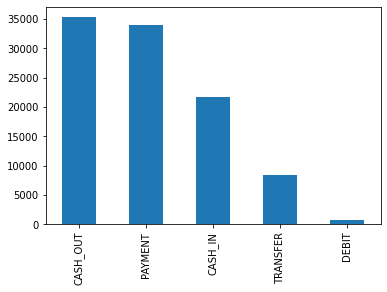

In [11]:
types = pd.value_counts(data_sample["type"])
types.plot(kind = "bar")

In [12]:
#The important features for our model are type and amount

### What is the distribution of the outcome? 

<AxesSubplot:>

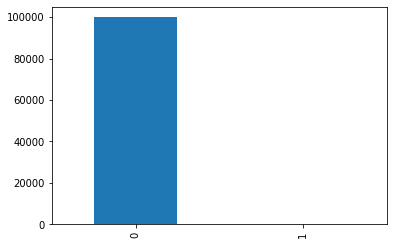

In [13]:
types = pd.value_counts(data_sample["isFraud"])
types.plot(kind = "bar")

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [14]:
#Drop the column with names info:
data_sample.drop(columns = ["nameDest","nameOrig"], inplace = True, axis = 1)
data_sample

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5904840,403,PAYMENT,20967.17,17116.00,0.00,0.00,0.00,0,0
1711863,160,CASH_OUT,9762.31,0.00,0.00,4530232.95,4539995.26,0,0
3905229,284,CASH_IN,117681.40,11299.00,128980.40,185223.04,67541.64,0,0
3525157,259,CASH_OUT,169063.58,10083.00,0.00,0.00,169063.58,0,0
2063814,181,CASH_IN,54839.68,7064558.20,7119397.88,798509.66,1000953.90,0,0
...,...,...,...,...,...,...,...,...,...
6152325,546,PAYMENT,2708.89,0.00,0.00,0.00,0.00,0,0
1775573,162,CASH_IN,46473.73,149419.00,195892.73,871.36,0.00,0,0
2464058,203,PAYMENT,9332.94,323096.20,313763.27,0.00,0.00,0,0
818699,40,PAYMENT,10686.13,44568.63,33882.50,0.00,0.00,0,0


In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_encoder = LabelEncoder()
label_column = ["type"]
data_sample[label_column] = data_sample[label_column].apply(label_encoder.fit_transform)

### Run a logisitc regression classifier and evaluate its accuracy.

In [17]:
X = data_sample.drop("isFraud", axis = 1)
y = data_sample["isFraud"]

# ALWAYS do the split before:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= 0.2)

In [18]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.99885

In [19]:
pred = LR.predict(X_test)

print("precision: ", precision_score(y_test,pred))
print("recall: ", recall_score(y_test,pred))
print("f1: ", f1_score(y_test,pred))

display(confusion_matrix(y_test,pred))

precision:  0.625
recall:  0.6451612903225806
f1:  0.634920634920635


array([[19957,    12],
       [   11,    20]], dtype=int64)

### Now pick a model of your choice and evaluate its accuracy.

In [20]:
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9994

In [21]:
pred = model.predict(X_test)

print("precision: ", precision_score(y_test,pred))
print("recall: ", recall_score(y_test,pred))
print("f1: ", f1_score(y_test,pred))

display(confusion_matrix(y_test,pred))

precision:  0.9523809523809523
recall:  0.6451612903225806
f1:  0.7692307692307692


array([[19968,     1],
       [   11,    20]], dtype=int64)

### Which model worked better and how do you know?

In [22]:
# The model that worked better was the DecisionTreeClassifier as the precision was better (0,95) compared with the 
# LogisticRegression that got 0,625.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.